# Acceptability conditions of models with Master polytropic EoS

## Parameter space

This notebook graphically shows the parameter space, based on the number of acceptability conditions fulfilled, for anisotropic spheres with master polytropic equation of state
\begin{equation}
    P = \kappa \rho^{1+\frac{1}{n}} + \alpha \rho - \beta \,.
\end{equation}
For a value of the polytropic index $n$ and a value of $\varkappa \ \left(= \frac{\rho_b}{\rho_c}\right)$. This code only works for $ \ varkappa $ equal to 0.05 or 0.2, and polytrophic index $ n $ equal to 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5 or 4.0, due to the data needed for the evaluation of the condition ** C7 **.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
import math
from scipy import integrate
from numpy import diff
from scipy.integrate import solve_ivp

In [2]:
plt.rc('text', usetex = True)
plt.rc('font', **{'family' : "sans-serif"})
params = {'text.latex.preamble' : [r'\usepackage{amssymb}']}
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

# Compact object modeling

## Structure equations

The structure equations are the result of manipulating the Einstein field equations for a given metric and energy tensor. They are the equations to be solved to model compact objects. In the case of static conigurations, with spherical symmetry and anisotropic pressure, the structure equations consist of
\begin{eqnarray}
P^{\prime} &=& - \left(\rho + P \right) \frac{m + 4 \pi r^{3} P}{r(r - 2m)} + \frac{2}{r} \left(P_{\perp} - P \right)  \label{EqHid} \tag{1} \\
m^{\prime} &=& 4 \pi r^{2} \rho \label{MasDif} \tag{2}
\end{eqnarray}
where $\rho$ is energy density, $m$ is mass, $P$ is radial pressure and $P_{\perp}$ is tangential pressure. The prime denotes derivative with respect to $r$.

## Equation of State

An equation of state (EoS) is a mathematical model between state variables that describes the most important physical processes that occur in a thermodynamic system. The master polytropic EoS consists of a relationship such that
\begin{equation}
P = \kappa \rho^{1+\frac{1}{n}} + \alpha \rho - \beta \,. \label{PoliMaestra} \tag{3}
\end{equation}

On the other hand, the anisotropic pressure is supposed to be of the form
\begin{equation}
\Delta\equiv P_{\perp} - P = C r (\rho + P) \frac{m + 4 \pi r^3 P}{r(r-2m)} \,, \label{Anisotropia} \tag{4}
\end{equation}
such that equation $\eqref{EqHid}$ is as
\begin{equation}
\frac{\mathrm{d}P}{\mathrm{d}r} = - h \frac{(\rho + P)(m + 4 \pi  r^3 P)}{r(r-2m)} \,, \label{EqHidCos} \tag{5}
\end{equation}
where $h = 1 - 2C$, and $C$ quantifies the anisotropy in the model.

## Lane-Emden equation

The structure equations can be written dimensionless when they are endowed with polytropic EoS. The result is known as the Lane-Emden equation, given by the change of variables
\begin{equation}
\Psi^{n}(\xi) = \frac{\rho}{\rho_{c}} \ , \ \ \eta \left(\xi \right) = \frac{m}{4 \pi \rho_c a^{3}} \quad \textrm{and} \quad r = a\xi \,,
\end{equation}
where
\begin{equation}
a^{2} = \frac{\Upsilon \left(n + 1 \right)}{4 \pi \rho_c} \ , \ \ \Upsilon = \kappa \rho_{c}^{1/n} = \frac{\sigma - \alpha \left(1 - \varkappa \right)}{1 - \varkappa^{1 + \frac{1}{n}}} \ , \ \ \sigma = \frac{P_{c}}{\rho_{c}} \quad \textrm{and} \quad \varkappa = \frac{\rho_{b}}{\rho_{c}} \,.
\end{equation}
The subscripts $c$ and $b$ indicate that the variable is evaluated at the center and surface of the configuration, respectively.

In this way, the dimensionless EoS $\eqref{PoliMaestra}$ and $\eqref{Anisotropia}$ are
\begin{eqnarray}
P &=& \rho_c \left\{\Upsilon \left( \Psi^{n+1} - \varkappa^{1 + \frac{1}{n}} \right) + \alpha \left(\Psi^{n} - \varkappa \right)\right\}  = \rho_c \mathcal{P} \quad \textrm{and} \label{PAdi} \tag{6} \\
\Delta &=& \frac{C \Upsilon (n+1) \left(\eta + \xi^{3} \mathcal{P} \right) \left(\Psi^{n} + \mathcal{P} \right) \rho_{c}}{\xi - 2  \Upsilon \left( n+1 \right) \eta} \,, \label{AniAdi} \tag{7}
\end{eqnarray}
respectively.

Finally, equations $\eqref{EqHidCos}$ and $\eqref{MasDif}$, written in dimensionless form, are
\begin{eqnarray}
\dot{\Psi} &=& - \frac{h \left(\eta + \xi^{3} \mathcal{P}\right) \left(1 + \frac{\mathcal{P}}{\Psi^{n}}\right)}{\xi \left\{\xi-2\,\Upsilon\,\left( n+1 \right) \eta\right\} \left\{1 + \frac{\alpha n}{\Upsilon \left(n+1\right) \Psi}\right\}}  \qquad \textrm{and} \label{PsiPunto} \tag{8} \\
\dot{\eta} &=& \xi^{2}\Psi^{n} \,, \label{EtaPunto} \tag{9}
\end{eqnarray}
where dot indicates derivative with respect to $\xi$.

Therefore, the system of equations to integrate numerically is given by $\eqref{PsiPunto}$ and $\eqref{EtaPunto}$, with initial conditions
\begin{equation}
\Psi (\xi = 0) = \Psi_{c} = 1 \,, \quad \eta (\xi = 0) = \eta_{c} = 0  \,,
\end{equation}
and boundary condition
\begin{equation}
\Psi (\xi = \xi_{b}) = 0 \,.
\end{equation}

In [3]:
# Defining system of equations: derivative of Psi and derivative of Eta as a function of xi
def funciones(xi,y, alpha, n, h, Upsilon, varkappa):
    psi_ , eta_ = y
    dydxi = [-h*(eta_ + xi**(3)*(Upsilon*(psi_**(n+1) - varkappa**(1+1/n)) + alpha*(psi_**(n) - varkappa)))*(1 + Upsilon*(psi_ - (varkappa**(1+1/n)/psi_**(n))) + alpha*(1 - (varkappa/psi_**(n))))/xi/(xi - 2*Upsilon*(n+1)*eta_) /(1 + alpha*n/Upsilon/(n+1)/psi_) 
             ,xi**(2)*psi_**(n)] 
    return dydxi

In [4]:
# The input parameters that characterize each model are defined: n, C, alpha, varkappa, sigma

n = 0.5           # Polytropic index n
print('n: ',n)

Lista_C = [0,1/32,1/16,3/32,1/8,5/32,3/16,7/32,1/4]   # List of anisotropic factors C
print('Values for C: ',end='')
print(*Lista_C, sep=', ')

Lista_alpha = [-0.1,-0.05,0.000001,0.05,0.099999]    # List of linear terms alpha
print('Values for \u03b1: ',end='')
print(*Lista_alpha, sep=', ')

varkappa = 0.05                                     # Ratio between surface density and central density
print('\u03f0:',varkappa)
   
# List of sigmas 
Lista_sigma = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8]
print('Values for \u03c3: ',end='')
print(*Lista_sigma, sep=', ')

# Total number of models evaluated
Numero_de_modelos = len(Lista_alpha)*len(Lista_C)*len(Lista_sigma)
print('Number of models: ', Numero_de_modelos)

n:  0.5
Values for C: 0, 0.03125, 0.0625, 0.09375, 0.125, 0.15625, 0.1875, 0.21875, 0.25
Values for α: -0.1, -0.05, 1e-06, 0.05, 0.099999
ϰ: 0.05
Values for σ: 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8
Number of models:  720


In [5]:
ListaModelos = []                                        # Container for all models

contador = 0

for i in range(len(Lista_alpha)):
    
    ListaModelos.append([])                              # Container for alpha
    
    alpha = Lista_alpha[i]             # alpha for each model
    
    for j in range(len(Lista_C)):
        
        ListaModelos[i].append([])                       # Container for C
        
        C = Lista_C[j]                # Anisotropic factor for each model
        h = 1 - 2*C
        
        for k in range(len(Lista_sigma)):
            
            ListaModelos[i][j].append([])                # Container for sigma
            
            sigma = Lista_sigma[k]    # Sigma for each model
            
            # Upsilon calculation
            Upsilon = (sigma - alpha*(1 - varkappa))/(1 - varkappa**(1 + 1/n))
                                 
            # Initial conditions
            Psi0 = 1.0
            Eta0 = 0.0
            y0 = [Psi0,Eta0]
            
            # Integration interval
            xi0 = 10**(-15) # Start
            ximax = 100000    # End, in case the condition to stop integration is not fulfilled
            xi_span = (xi0,ximax) # Integration space
        
            # Condition to stop integration (Dimensionless pressure less than 10**(-15))
            def stop_condition(xi,y,alpha, n, h, Upsilon, varkappa):
                return (1/sigma)*(Upsilon*(y[0]**(n+1) - varkappa**(1 + 1/n)) + alpha*(y[0]**(n) - varkappa)) - 10**-15
            stop_condition.terminal = True
        
            # Solution of the system of equations using the routine "solve_ivp" by means of the RK45 method
            # solve_ivp(Equations to integrate, Integration space, Initial conditions, Integration method,
            #           Condition to stop integration)
            soluciones = solve_ivp(funciones,xi_span,y0,method='RK45',events=stop_condition,
                                   args=(alpha, n, h, Upsilon, varkappa))
            
            if soluciones.status != 0:
                xi = soluciones.t
                Psi = soluciones.y[0]
                Eta = soluciones.y[1]
            else:
                ListaModelos[i][j][k] = ('gray','X',5),alpha,C,sigma
                print('Modelo sin borde. Parámetros: ',f'C = {C}, n = {n},\u03c3 = {sigma},\u03f0 = {varkappa},\u03b1 = {alpha}')
                contador = contador + 1
                continue
                
            varP = Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa) # Variable auxiliar
    
            # Derivative of Psi
            Psi1 = -h*(Eta+ xi**(3)*varP)*(1 + Upsilon*(Psi - (varkappa**(1 + 1/n)/Psi**(n))) + alpha*(1 - (varkappa/Psi**(n))))/xi/(xi - 2*Upsilon*(n+1)*Eta) /(1 + alpha*n/Upsilon/(n+1)/Psi)
                
            # Derivative of Eta
            Eta1 = xi**(2) * Psi**(n)
    
##########################################################################################################################
            
            # Xi normalized
            xiNorm = xi/xi[-1]
            
        ### Condition C1
        
            compacidad = 2*Upsilon*(n+1)*Eta/xi
            
        ### Condition C2
            
            # Energy density
            Densidad = Psi**(n)
            
            # Pression over central pressure
            PNorm = (1/sigma)*varP
            
            # Tangential pressure over central pressure
            PTNorm = C*Upsilon*(n+1)*(Eta + xi**(3)*varP)*(Psi**(n) + varP)/sigma/(xi - 2*Upsilon*(n+1)*Eta) + varP/sigma
            
            C2 = [Densidad, PNorm, PTNorm]
        
        ### Condition C3
        
            # Density gradient
            Dprima = n*Psi**(n-1)*Psi1   
            
            # Radial pressure gradient
            Pprima = (1/sigma)*Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/(n+1)/Upsilon/Psi)
            
            # Tangential pressure gradient
            Ptprima = (1/sigma)*(C*Upsilon*(n+1)*(((Eta1 + 3*xi**(2)*varP + xi**(3)*Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi))*(Psi**(n) + varP) + (Eta + xi**(3)*varP)*(n*Psi**(n-1)*Psi1 + Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi)))/(xi - 2*Upsilon*(n+1)*Eta) - (Eta + xi**(3)*varP)*(Psi**(n) + varP)*(1 - 2*Upsilon*(n+1)*Eta1)/(xi - 2*Upsilon*(n+1)*Eta)**(2)) + Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi))
        
            C3 = [Dprima,Pprima,Ptprima]
    
        ### Condition C4
        
            # Trace Energy Condition (TEC)      
            TEC = (1/sigma)*Densidad - PNorm - 2*PTNorm
            
        ### Condition C5
        
            # Radial speed of sound squared
            v2r = Upsilon*(1 + 1/n)*Psi + alpha 
            
            # Difference between speeds of sound squared
            vDelta2 = (C*Upsilon*(n+1)/(xi - 2*Upsilon*(n+1)*Eta))*((1 + Upsilon*(n+1)*Psi/n + alpha)*(Eta + xi**(3)*varP) + (Psi**(n) + varP)*xi**(2)*Psi*((Psi**(n) + 3*varP)/n/Psi**(n)/Psi1 + (xi/Psi)*((Upsilon*(n+1)*Psi)/n + alpha)) - Psi*(Psi**(n) + varP)*(Eta + xi**(3)*varP)*(1 - 2*Upsilon*(n+1)*xi**(2)*Psi**(n))/(n*Psi**(n)*Psi1*(xi - 2*Upsilon*(n+1)*Eta)))
            
            # Tangential speed of sound squared
            v2t = vDelta2 + v2r
            
            C5 = [v2r, v2t]
            
        ### Condition C6
        
            # Adiabatic index Gamma
            Gamma = v2r*(Densidad + sigma*PNorm)/PNorm/sigma
            
        ### Condition C8
        
            # Second derivative of Psi
            Psi11 = -(h/xi/(xi - 2*Upsilon*(n+1)*Eta)/(1 + alpha*n/Upsilon/(n+1)/Psi))*((Eta1 + 3*xi**(2)*varP + xi**(3)*(n+1)*Upsilon*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi))*(1 + Upsilon*(Psi - varkappa**(1 + 1/n)/Psi**(n)) + alpha*(1 - varkappa/Psi**(n))) + (Eta + xi**(3)*(Upsilon*(Psi**(n+1) - varkappa**(1+ 1/n)) + alpha*(Psi**(n) - varkappa)))*((n+1)*Upsilon*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi) - n*varP*Psi1/Psi**(n+1)) + (Eta + xi**(3)*varP)*(1 + Upsilon*(Psi - varkappa**(1 + 1/n)/Psi**(n)) + alpha*(1 - varkappa/Psi**(n)))*((2*Upsilon*(n+1)*Eta1 - 1)/(xi - 2*Upsilon*(n+1)*Eta) + alpha*n*Psi1/(1 + alpha*n/Upsilon/(n+1)/Psi)/Upsilon/(n+1)/Psi**(2) - 1/xi))
        
            # Cracking: deltaR1: Density, deltaR2: Mass, deltaR3: Pressure, delta R4: Pressure gradient 
            deltaR1 = h*Upsilon*(n+1)*(Eta + xi**(3)*varP)/xi/(xi - 2*Upsilon*(n+1)*Eta)
            deltaR2 = h*Upsilon*(n+1)*xi**(2)*Psi*(Psi**(n) + varP)*(1 + 2*Upsilon*(n+1)*varP*xi**(2))/n/Psi1/(xi - 2*Upsilon*(n+1)*Eta)**(2)
            deltaR3 = h*Upsilon*(n+1)*(Eta + xi**(3)*(Psi**(n) + 2*(Upsilon*(Psi**(n+1) - varkappa**(1+1/n)) + alpha*(Psi**(n) - varkappa))))*(Upsilon*(n+1)*Psi/n + alpha)/(xi*(xi - 2*Upsilon*(n+1)*Eta))
            deltaR4 = Upsilon*(n+1)*(n*Psi1**(2) + Psi*Psi11)/n/Psi1 + alpha*((n-1)*Psi1**(2) + Psi*Psi11)/Psi/Psi1
            
            deltaRMaster = deltaR1 + deltaR2 + deltaR3 + deltaR4

        ### Condition C9
            
            # Buoyancy
            Psin11 = n*(Psi**(n-1)*Psi11 + (n-1)*Psi**(n-2)*Psi1**(2))
            
############################################################################################################################
            
            # C1
            
            if any(compacidad >= 1):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # C2
            
            if any(Densidad < 0) or any(PNorm < 0) or any(PTNorm < 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # C3
            
            if any(Dprima > 0) or any (Pprima > 0) or any (Ptprima[5:] > 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # C4
            
            if any(TEC < 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # C5
            
            if any(Gamma < 4/3):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
            # C6
            
            if any(v2r > 1) or any(v2t > 1):
                ListaModelos[i][j][k].append(1)
            else:
                pass
            
###############################################################################  

            # C7. Data obtained from <<Master polytrope - C7>>
            
            if varkappa == 0.05 :
                
                if n == 0.5 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 or alpha == -0.05 or alpha == 0.000001 or alpha == 0.05 : pass
                        
                        elif alpha == 0.099999 and (sigma < 0.3 or sigma > 0.6 ) : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 or alpha == -0.05 or alpha == 0.000001 or alpha == 0.05 : pass
                        
                        elif alpha == 0.099999 and (sigma < 0.35 or sigma > 0.45 ) : ListaModelos[i][j][k].append(1)
                        
                        else : pass
                                
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 or alpha == -0.05 or alpha == 0.000001 : pass
                        
                        elif alpha == 0.05 and sigma > 0.775 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                    
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 or alpha == -0.05 or alpha == 0.000001 : pass
                        
                        elif alpha == 0.05 and sigma > 0.675 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 or alpha == -0.05 : pass
                        
                        elif alpha == 0.000001 and sigma > 0.775 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.6 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 : pass
                        
                        elif alpha == -0.05 and sigma > 0.8 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.675 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.5 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.775 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.7 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.6 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.425 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.675 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.6 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.5 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and (sigma < 0.1 or sigma > 0.35 ) : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.575 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.5 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.425 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and (sigma < 0.1 or sigma > 0.25) : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                    
                    else : pass
                        
                elif n == 1.0 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.625 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.525 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.4 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.575 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.475 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.35 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.55 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.45 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.325 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.5 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.425 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.3 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.45 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.375 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.275 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.425 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.35 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.375 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.325 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.35 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.275 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.3 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 1.5 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.375 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.275 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.35 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.275 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.325 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.3 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.3 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.275 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 2.0 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 2.5 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                            
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                    
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                            
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                            
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 3.0 :
                
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                            
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                    
                elif n == 3.5 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 4.0 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                
                else : pass           
            
            elif varkappa == 0.2:
                
                if n == 0.5 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 or alpha == -0.05 or alpha == 0.000001 or alpha == 0.05 : pass
                        
                        elif alpha == 0.099999 and sigma < 0.1 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 or alpha == -0.05 or alpha == 0.000001 or alpha == 0.05 : pass
                        
                        elif alpha == 0.099999 and (sigma < 0.1 or sigma > 0.775 ) : ListaModelos[i][j][k].append(1)
                        
                        else : pass
                            
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 or alpha == -0.05 or alpha == 0.000001 : pass
                        
                        elif alpha == 0.05 and sigma > 0.825 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 and (sigma < 0.1 or sigma > 0.675 ) : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 or alpha == -0.05 : pass
                        
                        elif alpha == 0.000001 and sigma > 0.85 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.75 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 and (sigma < 0.125 or sigma > 0.6 ) : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 or alpha == -0.05 : pass
                        
                        elif alpha == 0.000001 and sigma > 0.775 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.65 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 and (sigma < 0.125 or sigma > 0.525 ) : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.85 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.75 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.675 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.575 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 and (sigma < 0.125 or sigma > 0.425 ) : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.725 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.675 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.575 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.475 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 and (sigma < 0.125 or sigma > 0.35 ) : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.625 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.575 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.5 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.4 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 and (sigma < 0.15 or sigma > 0.25 ) : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.55 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.475 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.425 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.325 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 1.0 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.525 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.45 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.375 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.525 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.425 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.35 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                            
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.475 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.4 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.325 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.425 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.375 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.3 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.4 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.35 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.275 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.375 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.325 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.35 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.3 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.3 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.275 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 1.5 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.3 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.275 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                            
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.275 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.25 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.225 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 2.0 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.2 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                            
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.175 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 2.5 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.15 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                            
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.125 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 3.0 :
                
                    if C == 0.0 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                            
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 and sigma > 0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                    
                elif n == 3.5 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                            
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                        
                elif n == 4.0 :
                    
                    if C == 0.0 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.03125 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                            
                    elif C == 0.0625 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.09375 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.125 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.15625 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.1875 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.21875 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    elif C == 0.25 :
                        
                        if alpha == -0.1 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == -0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.000001 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.05 : ListaModelos[i][j][k].append(1)
                        
                        elif alpha == 0.099999 : ListaModelos[i][j][k].append(1)
                            
                        else : pass
                        
                    else : pass
                
                else : pass
                
            else : pass
            
############################################################################################################################

            # C8
           
            if any(np.diff(np.sign(deltaRMaster[1:])) != 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass

            # C9
            
            if any(Psin11 > 0):
                ListaModelos[i][j][k].append(1)
            else:
                pass 
            
            ListaModelos[i][j][k] = (('red','o',5) if len(ListaModelos[i][j][k]) == 0
                                     else ('blue','o',5) if len(ListaModelos[i][j][k]) == 1
                                     else ('green','o',5) if len(ListaModelos[i][j][k]) == 2
                                     else ('darkorange','o',5) if len(ListaModelos[i][j][k]) == 3
                                     else ('purple','o',5) if len(ListaModelos[i][j][k]) == 4
                                     else ('white','o',0)),C,n,sigma

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [6]:
print(contador, ' out of', Numero_de_modelos, ' do not have boundary')

0  out of 720  do not have boundary


In [7]:
legend_elements = [Line2D([0],[0],marker='o',color='w',label='9',markerfacecolor='red',markersize=5),
                   Line2D([0],[0],marker='o',color='w',label='8',markerfacecolor='blue',markersize=5),
                   Line2D([0],[0],marker='o',color='w',label='7',markerfacecolor='green',markersize=5),
                   Line2D([0],[0],marker='o',color='w',label='6',markerfacecolor='darkorange',markersize=5),
                   Line2D([0],[0],marker='o',color='w',label='5',markerfacecolor='purple',markersize=5)]

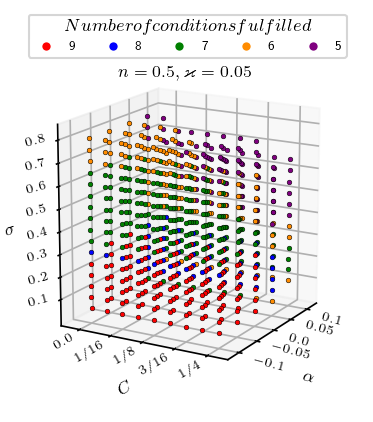

In [8]:
fig = plt.figure(figsize=(6,9),dpi=150)
fig.suptitle(r'$n = {}, \varkappa = {}$'.format(n,varkappa),x=0.31,y=0.86,fontsize=8,zorder=7)

ax1 = fig.add_subplot(321, projection='3d',zorder=3)

for i in range(len(Lista_alpha)):
        
    for j in range(len(Lista_C)):
                
        for k in range(len(Lista_sigma)):
            
            ax1.scatter(Lista_alpha[i],Lista_C[j],Lista_sigma[k],c=ListaModelos[i][j][k][0][0],marker=ListaModelos[i][j][k][0][1],
                        s=ListaModelos[i][j][k][0][2],edgecolors='k',linewidths=0.25)

ax1.xaxis.set_rotate_label(False)
ax1.yaxis.set_rotate_label(False)
ax1.zaxis.set_rotate_label(False)
ax1.set_xlabel(r'$\alpha$',fontsize=8,labelpad=-3.0,rotation=-15)
ax1.set_ylabel(r'$C$',fontsize=8,labelpad=-5.5,rotation=30)
ax1.set_zlabel(r'$\sigma$',fontsize=8,labelpad=-5,rotation=15)
ax1.set_xticks([-0.1,-0.05,0.0,0.05,0.1])
ax1.set_yticks([0,1/16,1/8,3/16,1/4])
ax1.set_zticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
ax1.grid(b=True,)
ax1.set_xbound(-0.125,0.125)
ax1.set_ybound(-1/32,9/32)
ax1.set_zbound(0.0,0.85)
ax1.tick_params(axis='x',pad=-1,labelsize=8,labelrotation=-15)
ax1.tick_params(axis='y',pad=-4,labelsize=8,labelrotation=30)
ax1.tick_params(axis='z',pad=3,labelsize=8,labelrotation=15)
ax1.set_xticklabels([r'$-0.1$',r'$-0.05$',r'$0.0$',r'$0.05$',r'$0.1$'],ha='left',va='bottom',fontsize=6)
ax1.set_yticklabels([r'$0.0$',r'$1/16$',r'$1/8$',r'$3/16$',r'$1/4$'],ha='right',va='baseline',fontsize=6)
ax1.set_zticklabels([r'$0.1$',r'$0.2$',r'$0.3$',r'$0.4$',r'$0.5$',r'$0.6$',r'$0.7$',r'$0.8$'],ha='left',va='baseline',fontsize=6)
ax1.view_init(elev=-165, azim=150)
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.invert_zaxis()
ax1.set_zbound(0.0,0.85)

Legend = ax1.legend(handles=legend_elements,title=r'$Number of conditions fulfilled$',
                     ncol=5,loc=(0.03,0.95),fontsize=6)
plt.setp(Legend.get_title(),fontsize='small')

fig.subplots_adjust(wspace=0.075,hspace=-0.1)
plt.show()